### Relax Data Science Challenge

In [ ]:
#Notes about this project 
#2 attached csv files - load and merge
#One has user information, the other has user experience info 

Problem: Identify which factors predict future user adoption. Adoption means the user has logged in for three consective days over a seven day period(week).

In [ ]:
#Data Wrangling 
#Exploratory Data Analysis 
#Model 
#Recommendations/Findings

#### Data Wrangling

In [1]:
#Needed Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime, date, timezone

In [2]:
df_user = pd.read_csv('takehome_users.csv', encoding='latin1')

In [3]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
df_user['last_session_creation_time'].value_counts()

1.401868e+09    2
1.401917e+09    2
1.398139e+09    1
1.381812e+09    1
1.400737e+09    1
               ..
1.393803e+09    1
1.343116e+09    1
1.382131e+09    1
1.373158e+09    1
1.390727e+09    1
Name: last_session_creation_time, Length: 8821, dtype: int64

In [6]:
df_user.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [7]:
df_user['invited_by_user_id']

0        10803.0
1          316.0
2         1525.0
3         5151.0
4         5240.0
          ...   
11995     8263.0
11996        NaN
11997     8074.0
11998        NaN
11999        NaN
Name: invited_by_user_id, Length: 12000, dtype: float64

In [8]:
df_user.fillna(0, inplace=True)

In [9]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [10]:
df_user.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,0.000000e+00,1,1,74,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,0.000000e+00,0,0,302,0.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [11]:
df_user['creation_time'] = pd.to_datetime(df_user['creation_time'])

Dropping unnecessary columns with private information: name, email, last_session_creation_time
* last_session_creation_time - unix timestamp of last login

In [12]:
df_user = df_user.drop(['name','email', 'last_session_creation_time'], axis=1)

In [13]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   opted_in_to_mailing_list    12000 non-null  int64         
 4   enabled_for_marketing_drip  12000 non-null  int64         
 5   org_id                      12000 non-null  int64         
 6   invited_by_user_id          12000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 656.4+ KB


In [14]:
df_user.head(10)

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240.0
5,6,2013-12-17 03:37:06,GUEST_INVITE,0,0,197,11241.0
6,7,2012-12-16 13:24:32,SIGNUP,0,1,37,0.0
7,8,2013-07-31 05:34:02,PERSONAL_PROJECTS,1,1,74,0.0
8,9,2013-11-05 04:04:24,PERSONAL_PROJECTS,0,0,302,0.0
9,10,2013-01-16 22:08:03,ORG_INVITE,1,1,318,4143.0


In [15]:
df_user['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [16]:
#This can be one_hot_encoded 
df_user = pd.concat([df_user, pd.get_dummies(df_user['creation_source'], drop_first=False)], axis=1)
#Make a login_count column
#Set object_id to be the index

In [17]:
df_user = df_user.drop(['creation_source'], axis=1)

In [18]:
df_user.set_index('object_id', inplace=True)

In [19]:
df_user.head(10)

,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0
2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0
3,2013-03-19 23:14:52,0,0,94,1525.0,0,1,0,0,0
4,2013-05-21 08:09:28,0,0,1,5151.0,1,0,0,0,0
5,2013-01-17 10:14:20,0,0,193,5240.0,1,0,0,0,0
6,2013-12-17 03:37:06,0,0,197,11241.0,1,0,0,0,0
7,2012-12-16 13:24:32,0,1,37,0.0,0,0,0,1,0
8,2013-07-31 05:34:02,1,1,74,0.0,0,0,1,0,0
9,2013-11-05 04:04:24,0,0,302,0.0,0,0,1,0,0


In [20]:
df_user.head(10)

,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0
2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0
3,2013-03-19 23:14:52,0,0,94,1525.0,0,1,0,0,0
4,2013-05-21 08:09:28,0,0,1,5151.0,1,0,0,0,0
5,2013-01-17 10:14:20,0,0,193,5240.0,1,0,0,0,0
6,2013-12-17 03:37:06,0,0,197,11241.0,1,0,0,0,0
7,2012-12-16 13:24:32,0,1,37,0.0,0,0,0,1,0
8,2013-07-31 05:34:02,1,1,74,0.0,0,0,1,0,0
9,2013-11-05 04:04:24,0,0,302,0.0,0,0,1,0,0


In [21]:
df_user.index.name = 'user_id'

#### Loading the next dataframe

In [22]:
df_exp = pd.read_csv('takehome_user_engagement.csv', encoding='latin1')

In [23]:
df_exp.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [24]:
df_exp['user_id'].value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
4699       1
4698       1
4697       1
4696       1
12000      1
Name: user_id, Length: 8823, dtype: int64

In [25]:
df_exp['visited'].value_counts()

1    207917
Name: visited, dtype: int64

In [26]:
#Drop visited numbers 
df_exp = df_exp.drop(['visited'], axis=1)

In [27]:
df_exp['time_stamp'] = pd.to_datetime(df_exp['time_stamp'])

In [28]:
df_exp

,time_stamp,user_id
0,2014-04-22 03:53:30,1
1,2013-11-15 03:45:04,2
2,2013-11-29 03:45:04,2
3,2013-12-09 03:45:04,2
4,2013-12-25 03:45:04,2
...,...,...
207912,2013-09-06 06:14:15,11996
207913,2013-01-15 18:28:37,11997
207914,2014-04-27 12:45:16,11998
207915,2012-06-02 11:55:59,11999


In [29]:
df_exp.head()

,time_stamp,user_id
0,2014-04-22 03:53:30,1
1,2013-11-15 03:45:04,2
2,2013-11-29 03:45:04,2
3,2013-12-09 03:45:04,2
4,2013-12-25 03:45:04,2


In [30]:
#User_id has the same value for different timestamps 
#visited is unnecessary since we can use the timestamp for this 
#groupby, split, merge on column       

In [31]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 MB


In [32]:
df3 = df_user.merge(df_exp, how= 'left', left_on='user_id', right_on='user_id')
df3.head(15)

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,time_stamp
0,1,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-11-15 03:45:04
2,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-11-29 03:45:04
3,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-12-09 03:45:04
4,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-12-25 03:45:04
5,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-12-31 03:45:04
6,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2014-01-08 03:45:04
7,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2014-02-03 03:45:04
8,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2014-02-08 03:45:04
9,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2014-02-09 03:45:04


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211094 entries, 0 to 211093
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     211094 non-null  int64         
 1   creation_time               211094 non-null  datetime64[ns]
 2   opted_in_to_mailing_list    211094 non-null  int64         
 3   enabled_for_marketing_drip  211094 non-null  int64         
 4   org_id                      211094 non-null  int64         
 5   invited_by_user_id          211094 non-null  float64       
 6   GUEST_INVITE                211094 non-null  uint8         
 7   ORG_INVITE                  211094 non-null  uint8         
 8   PERSONAL_PROJECTS           211094 non-null  uint8         
 9   SIGNUP                      211094 non-null  uint8         
 10  SIGNUP_GOOGLE_AUTH          211094 non-null  uint8         
 11  time_stamp                  207917 non-

In [34]:
df3.time_stamp.value_counts()

2013-04-06 21:21:37    2
2013-10-04 21:21:37    2
2014-01-20 07:46:58    2
2013-10-07 21:21:37    2
2014-01-29 01:13:02    2
                      ..
2013-04-14 08:28:50    1
2013-04-16 08:28:50    1
2013-04-20 08:28:50    1
2013-04-21 08:28:50    1
2014-01-26 08:57:12    1
Name: time_stamp, Length: 207220, dtype: int64

In [35]:
df3.time_stamp.isna().sum()

3177

In [36]:
#What to do with missing time data?
df3.time_stamp.fillna(0)

0         2014-04-22 03:53:30
1         2013-11-15 03:45:04
2         2013-11-29 03:45:04
3         2013-12-09 03:45:04
4         2013-12-25 03:45:04
                 ...         
211089    2013-09-06 06:14:15
211090    2013-01-15 18:28:37
211091    2014-04-27 12:45:16
211092    2012-06-02 11:55:59
211093    2014-01-26 08:57:12
Name: time_stamp, Length: 211094, dtype: object

#### Determine Login_counts per user

In [37]:
login = df3.groupby(['user_id'], as_index=False)['time_stamp'].nunique()
lg = login.sort_values(['time_stamp'], ascending =False)
    #puts all the logins for a user into one table 
#print(lg)
#Extract some work into a separate dataframe and then go back to it 
print(type(login))
login = login.set_index('user_id')
dict_time_stamp_count = login.to_dict()

<class 'pandas.core.frame.DataFrame'>


In [38]:
df3.head()
df3 = df3.set_index('user_id')

In [39]:
#Whats the goal of merging this dataframe with the count of timestamps? 
#based on the definition of the problem a user that has logged in at least 3x in a seven day period 
df_login_merge = pd.merge(df3, login, left_index=True, right_index=True)

In [40]:
df_login_merge.head()

,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,time_stamp_x,time_stamp_y
user_id,,,,,,,,,,,,
1,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,2014-04-22 03:53:30,1
2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-11-15 03:45:04,14
2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-11-29 03:45:04,14
2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-12-09 03:45:04,14
2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-12-25 03:45:04,14


In [41]:
df_login_merge = df_login_merge.rename(columns={'time_stamp_x': 'time_stamp', 'time_stamp_y': 'login_count'})

In [42]:
df_login_merge.head()

,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,time_stamp,login_count
user_id,,,,,,,,,,,,
1,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,2014-04-22 03:53:30,1
2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-11-15 03:45:04,14
2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-11-29 03:45:04,14
2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-12-09 03:45:04,14
2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-12-25 03:45:04,14


In [43]:
df_login_merge = df_login_merge.reset_index()

In [44]:
df_login_merge.index = np.arange(1, len(df_login_merge) +1)
df_login_merge.index.name = 'object_id'

In [45]:
df_login_merge.head()

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,time_stamp,login_count
object_id,,,,,,,,,,,,,
1,1,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,2014-04-22 03:53:30,1
2,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-11-15 03:45:04,14
3,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-11-29 03:45:04,14
4,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-12-09 03:45:04,14
5,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-12-25 03:45:04,14


In [46]:
df_login_merge.isna().sum()  

user_id                          0
creation_time                    0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
GUEST_INVITE                     0
ORG_INVITE                       0
PERSONAL_PROJECTS                0
SIGNUP                           0
SIGNUP_GOOGLE_AUTH               0
time_stamp                    3177
login_count                      0
dtype: int64

In [47]:
#Made creation_time the time_stamp for those time_stamps that were missing
df_login_merge['time_stamp'] = df_login_merge['time_stamp'].fillna(df_login_merge['creation_time'])

In [48]:
df_login_merge['time_stamp'].isna().sum()  

0

In [49]:
df_login_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211094 entries, 1 to 211094
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     211094 non-null  int64         
 1   creation_time               211094 non-null  datetime64[ns]
 2   opted_in_to_mailing_list    211094 non-null  int64         
 3   enabled_for_marketing_drip  211094 non-null  int64         
 4   org_id                      211094 non-null  int64         
 5   invited_by_user_id          211094 non-null  float64       
 6   GUEST_INVITE                211094 non-null  uint8         
 7   ORG_INVITE                  211094 non-null  uint8         
 8   PERSONAL_PROJECTS           211094 non-null  uint8         
 9   SIGNUP                      211094 non-null  uint8         
 10  SIGNUP_GOOGLE_AUTH          211094 non-null  uint8         
 11  time_stamp                  211094 non-

#### Determine Adoption (3 logins within 7 day window)

In [50]:
#Definietly use a counter 
#I want to count from the date of login to 7 day time point 
resample = df_login_merge.groupby(['user_id']).resample('1D', on='time_stamp').count()
window = resample.rolling(window=7, min_periods=3).sum()
filtered = window[window['time_stamp'] >=3]


In [51]:
filtered.head(15)

user_id  creation_time  opted_in_to_mailing_list  \
user_id time_stamp                                                     
2       2014-02-09      3.0            3.0                       3.0   
        2014-02-13      3.0            3.0                       3.0   
        2014-02-14      3.0            3.0                       3.0   
4       2013-05-22      3.0            3.0                       3.0   
5       2013-01-22      4.0            4.0                       4.0   
6       2013-12-19      5.0            5.0                       5.0   
7       2012-12-20      6.0            6.0                       6.0   
8       2013-07-31      7.0            7.0                       7.0   
9       2013-11-05      7.0            7.0                       7.0   
10      2013-01-16      7.0            7.0                       7.0   
        2013-01-17      6.0            6.0                       6.0   
        2013-01-18      5.0            5.0                       5.0   
        2013-01-19      4.0            4.0                       4.0   
        2013-01-20      3.0            3.0                       3.0   
        2013-02-19      3.0            3.0                       3.0   

                    enabled_for_marketing_drip  org_id  invited_by_user_id  \
user_id time_stamp                                                           
2       2014-02-09                         3.0     3.0                 3.0   
        2014-02-13                         3.0     3.0                 3.0   
        2014-02-14                         3.0     3.0                 3.0   
4       2013-05-22                         3.0     3.0                 3.0   
5       2013-01-22                         4.0     4.0                 4.0   
6       2013-12-19                         5.0     5.0                 5.0   
7       2012-12-20                         6.0     6.0                 6.0   
8       2013-07-31                         7.0     7.0                 7.0   
9       2013-11-05                         7.0     7.0                 7.0   
10      2013-01-16                         7.0     7.0                 7.0   
        2013-01-17                         6.0     6.0                 6.0   
        2013-01-18                         5.0     5.0                 5.0   
        2013-01-19                         4.0     4.0                 4.0   
        2013-01-20                         3.0     3.0                 3.0   
        2013-02-19                         3.0     3.0                 3.0   

                    GUEST_INVITE  ORG_INVITE  PERSONAL_PROJECTS  SIGNUP  \
user_id time_stamp                                                        
2       2014-02-09           3.0         3.0                3.0     3.0   
        2014-02-13           3.0         3.0                3.0     3.0   
        2014-02-14           3.0         3.0                3.0     3.0   
4       2013-05-22           3.0         3.0                3.0     3.0   
5       2013-01-22           4.0         4.0                4.0     4.0   
6       2013-12-19           5.0         5.0                5.0     5.0   
7       2012-12-20           6.0         6.0                6.0     6.0   
8       2013-07-31           7.0         7.0                7.0     7.0   
9       2013-11-05           7.0         7.0                7.0     7.0   
10      2013-01-16           7.0         7.0                7.0     7.0   
        2013-01-17           6.0         6.0                6.0     6.0   
        2013-01-18           5.0         5.0                5.0     5.0   
        2013-01-19           4.0         4.0                4.0     4.0   
        2013-01-20           3.0         3.0                3.0     3.0   
        2013-02-19           3.0         3.0                3.0     3.0   

                    SIGNUP_GOOGLE_AUTH  time_stamp  login_count  
user_id time_stamp                                               
2       2014-02-09                 3.0         3.0          

In [52]:
group = filtered.groupby(level=0)

In [53]:
group.head()

user_id  creation_time  opted_in_to_mailing_list  \
user_id time_stamp                                                     
2       2014-02-09      3.0            3.0                       3.0   
        2014-02-13      3.0            3.0                       3.0   
        2014-02-14      3.0            3.0                       3.0   
4       2013-05-22      3.0            3.0                       3.0   
5       2013-01-22      4.0            4.0                       4.0   
...                     ...            ...                       ...   
11996   2013-09-06      6.0            6.0                       6.0   
11997   2013-01-15      7.0            7.0                       7.0   
11998   2014-04-27      7.0            7.0                       7.0   
11999   2012-06-02      7.0            7.0                       7.0   
12000   2014-01-26      7.0            7.0                       7.0   

                    enabled_for_marketing_drip  org_id  invited_by_user_id  \
user_id time_stamp                                                           
2       2014-02-09                         3.0     3.0                 3.0   
        2014-02-13                         3.0     3.0                 3.0   
        2014-02-14                         3.0     3.0                 3.0   
4       2013-05-22                         3.0     3.0                 3.0   
5       2013-01-22                         4.0     4.0                 4.0   
...                                        ...     ...                 ...   
11996   2013-09-06                         6.0     6.0                 6.0   
11997   2013-01-15                         7.0     7.0                 7.0   
11998   2014-04-27                         7.0     7.0                 7.0   
11999   2012-06-02                         7.0     7.0                 7.0   
12000   2014-01-26                         7.0     7.0                 7.0   

                    GUEST_INVITE  ORG_INVITE  PERSONAL_PROJECTS  SIGNUP  \
user_id time_stamp                                                        
2       2014-02-09           3.0         3.0                3.0     3.0   
        2014-02-13           3.0         3.0                3.0     3.0   
        2014-02-14           3.0         3.0                3.0     3.0   
4       2013-05-22           3.0         3.0                3.0     3.0   
5       2013-01-22           4.0         4.0                4.0     4.0   
...                          ...         ...                ...     ...   
11996   2013-09-06           6.0         6.0                6.0     6.0   
11997   2013-01-15           7.0         7.0                7.0     7.0   
11998   2014-04-27           7.0         7.0                7.0     7.0   
11999   2012-06-02           7.0         7.0                7.0     7.0   
12000   2014-01-26           7.0         7.0                7.0     7.0   

                    SIGNUP_GOOGLE_AUTH  time_stamp  login_count  
user_id time_stamp                                               
2       2014-02-09                 3.0         3.0          3.0  
        2014-02-13                 3.0         3.0          3.0  
        2014-02-14                 3.0         3.0          3.0  
4       2013-05-22                 3.0         3.0          3.0  
5       2013-01-22                 4.0         4.0          4.0  
...                                ...         ...          ...  
11996   2013-09-06                 6.0         6.0          6.0  
11997   2013-01-15                 7.0         7.0          7.0  
11998   2014-04-27                 7.0         7.0          7.0  
11999   2012-06-02                 7.0         7.0          7.0  
12000   2014-01-26                 7.0         7.0          7.0  

[20941 rows x 13 columns]

#### Working with a sample dataset

In [54]:
sample_df = df_login_merge.sample(n=10)

In [55]:
#sample_df['date'] = pd.to_datetime(sample_df['time_stamp'], format='%Y-%m-%d')

In [56]:
# sample_df['time_stamp'] = pd.to_datetime(sample_df['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [57]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 168868 to 145981
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     10 non-null     int64         
 1   creation_time               10 non-null     datetime64[ns]
 2   opted_in_to_mailing_list    10 non-null     int64         
 3   enabled_for_marketing_drip  10 non-null     int64         
 4   org_id                      10 non-null     int64         
 5   invited_by_user_id          10 non-null     float64       
 6   GUEST_INVITE                10 non-null     uint8         
 7   ORG_INVITE                  10 non-null     uint8         
 8   PERSONAL_PROJECTS           10 non-null     uint8         
 9   SIGNUP                      10 non-null     uint8         
 10  SIGNUP_GOOGLE_AUTH          10 non-null     uint8         
 11  time_stamp                  10 non-null     datetim

In [72]:
for i in sample_df['time_stamp']:
    print(i.date())

2014-03-14
2014-03-30
2014-02-19
2014-04-23
2013-07-15
2014-02-23
2013-08-15
2014-05-19
2014-03-23
2013-12-01


In [73]:
#make a function

def max_adoption(user_id, time_stamp,filtered): 
    for index in filtered.index:
        if index[0] == user_id and index[1].date() == time_stamp.date():
            return 1
        
    return 0
    #From filtered get the user_id and time_stamp
    #Go to df_login_merge and compare 
    #get the timeframe that I have

sample_df['Adopted'] = sample_df.apply(lambda sample_df: 
                                                 max_adoption(sample_df['user_id'], 
                                                              sample_df['time_stamp'],filtered), axis=1)

In [74]:
sample_df.head()

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,time_stamp,login_count,date,Adopted
object_id,,,,,,,,,,,,,,,
168868,9450,2012-10-16 14:04:36,0,0,78,6597.0,1,0,0,0,0,2014-03-14 14:04:36,451,2014-03-14 14:04:36,1
14234,851,2013-02-24 15:03:23,0,0,74,0.0,0,0,0,1,0,2014-03-30 15:03:23,130,2014-03-30 15:03:23,0
202878,11349,2013-06-11 03:58:44,1,1,127,2125.0,1,0,0,0,0,2014-02-19 03:58:44,181,2014-02-19 03:58:44,1
50846,2948,2013-10-25 05:03:46,1,0,190,1469.0,0,1,0,0,0,2014-04-23 05:03:46,56,2014-04-23 05:03:46,0
163936,9306,2013-05-07 17:15:51,0,0,238,9577.0,0,1,0,0,0,2013-07-15 17:15:51,94,2013-07-15 17:15:51,1


In [71]:
sample_df['Adopted'].value_counts()

1    7
0    3
Name: Adopted, dtype: int64

In [ ]:
#DONRT RELOAD WILL TAKE AN HOUR

In [76]:
def max_adoption(user_id, time_stamp,filtered): 
    for index in filtered.index:
        if index[0] == user_id and index[1].date() == time_stamp.date():
            return 1
        
    return 0
    #From filtered get the user_id and time_stamp
    #Go to df_login_merge and compare 
    #get the timeframe that I have

df_login_merge['Adopted'] = df_login_merge.apply(lambda df_login_merge: 
                                                 max_adoption(df_login_merge['user_id'], 
                                                              df_login_merge['time_stamp'],filtered), axis=1)

### Exploratory Data Analysis

In [81]:
#Correlation plot df_merge
df_login_merge.head()

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,time_stamp,login_count,Adopted
object_id,,,,,,,,,,,,,,
1,1,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,2014-04-22 03:53:30,1,0
2,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-11-15 03:45:04,14,0
3,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-11-29 03:45:04,14,0
4,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-12-09 03:45:04,14,0
5,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-12-25 03:45:04,14,0


In [82]:
df_login_merge.head()

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,time_stamp,login_count,Adopted
object_id,,,,,,,,,,,,,,
1,1,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,2014-04-22 03:53:30,1,0
2,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-11-15 03:45:04,14,0
3,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-11-29 03:45:04,14,0
4,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-12-09 03:45:04,14,0
5,2,2013-11-15 03:45:04,0,0,1,316.0,0,1,0,0,0,2013-12-25 03:45:04,14,0


In [83]:
df_login_merge.describe()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,login_count,Adopted
count,211094.000000,211094.000000,211094.000000,211094.000000,211094.000000,211094.000000,211094.000000,211094.000000,211094.000000,211094.000000,211094.000000,211094.000000
mean,5913.818777,0.257890,0.154344,163.949558,3352.867438,0.224407,0.337087,0.097440,0.178754,0.162312,251.989346,0.816006
std,3395.988763,0.437474,0.361279,121.240661,3834.712022,0.417192,0.472716,0.296557,0.383148,0.368737,159.599845,0.387480
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3081.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,1.000000
50%,5685.000000,0.000000,0.000000,145.000000,1579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,1.000000
75%,8944.000000,1.000000,0.000000,260.000000,6442.000000,0.000000,1.000000,0.000000,0.000000,0.000000,377.000000,1.000000
max,12000.000000,1.000000,1.000000,416.000000,11999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,606.000000,1.000000


In [86]:
import seaborn as sns

<AxesSubplot:>

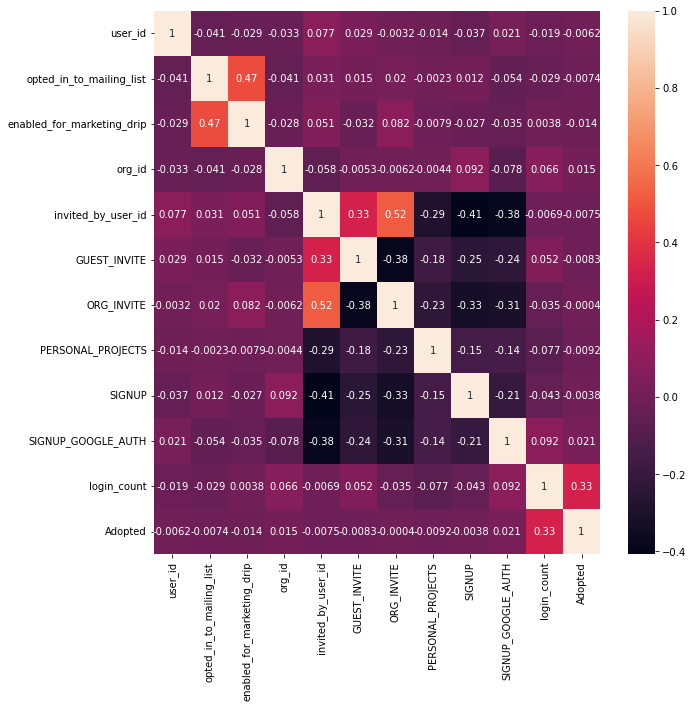

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(df_login_merge.corr(), annot=True)

In [100]:
#Drop certain columns
df_new = df_login_merge.drop(['creation_time', 'time_stamp'],axis=1)

In [105]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211094 entries, 1 to 211094
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     211094 non-null  int64  
 1   opted_in_to_mailing_list    211094 non-null  int64  
 2   enabled_for_marketing_drip  211094 non-null  int64  
 3   org_id                      211094 non-null  int64  
 4   invited_by_user_id          211094 non-null  float64
 5   GUEST_INVITE                211094 non-null  uint8  
 6   ORG_INVITE                  211094 non-null  uint8  
 7   PERSONAL_PROJECTS           211094 non-null  uint8  
 8   SIGNUP                      211094 non-null  uint8  
 9   SIGNUP_GOOGLE_AUTH          211094 non-null  uint8  
 10  login_count                 211094 non-null  int64  
 11  Adopted                     211094 non-null  int64  
dtypes: float64(1), int64(6), uint8(5)
memory usage: 13.9 MB


### Preprocessing

In [92]:
#Did some one-hot-encoding earlier 

In [101]:
X = df_new.loc[:, ~df_new.columns.isin(['Adopted'])]

In [102]:
y = df_new['Adopted']

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

### Modeling

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [107]:
from sklearn.metrics import classification_report

In [108]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test))) 

Accuracy of logistic regression classifier on test set: 0.82


In [114]:
from sklearn import metrics

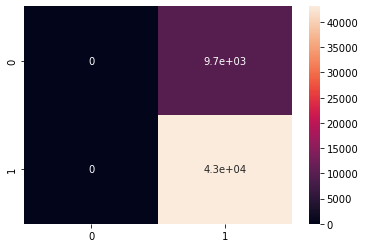

In [115]:
cm_lg = metrics.confusion_matrix(y_test, y_pred)
cm_plot = sns.heatmap(cm_lg, annot=True)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9660
           1       0.82      1.00      0.90     43114

    accuracy                           0.82     52774
   macro avg       0.41      0.50      0.45     52774
weighted avg       0.67      0.82      0.73     52774



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
#GaussianNB (Naive Bayes)
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.8150414977072044


In [118]:
#DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
dtc_pred = DTC.predict(X_test)
print("Decision Tree score: ",DTC.score(X_test, y_test))

Decision Tree score:  0.8343502482282943


In [111]:
#RandomForestClassifier
RF = RandomForestClassifier(n_estimators=1000, max_depth=10,class_weight="balanced")
RF.fit(X_train,y_train)
y_rf_pred = RF.predict(X_test)
print("Random Forest Classifier accuracy score: ",RF.score(X_test, y_test))

Random Forest Classifier accuracy score:  0.7225527721984311


In [112]:
pd.DataFrame(y_rf_pred).value_counts()

1    33774
0    19000
dtype: int64

In [119]:
from sklearn.metrics import classification_report
print('Random Forest Classification Report')
print(classification_report(y_test, y_rf_pred))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.37      0.73      0.49      9660
           1       0.92      0.72      0.81     43114

    accuracy                           0.72     52774
   macro avg       0.65      0.72      0.65     52774
weighted avg       0.82      0.72      0.75     52774



In [120]:
print('Decision Tree Classification Report')
print(classification_report(y_test, dtc_pred))

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.59      0.30      0.40      9660
           1       0.86      0.95      0.90     43114

    accuracy                           0.83     52774
   macro avg       0.73      0.63      0.65     52774
weighted avg       0.81      0.83      0.81     52774



In [122]:
print('Naive Bayes Classification Report')
print(classification_report(y_test, nb_pred))

Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.33      0.01      0.02      9660
           1       0.82      1.00      0.90     43114

    accuracy                           0.82     52774
   macro avg       0.57      0.50      0.46     52774
weighted avg       0.73      0.82      0.74     52774

